<a href="https://www.kaggle.com/code/altarnolutarkan/lstm-xgboost-precipitation-nowcast?scriptVersionId=129970235" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np 
import pandas as pd
import os
from netCDF4 import Dataset

In [2]:
data = Dataset(r'/kaggle/input/istanbul-era5-reanalysis-data-2022/adaptor.mars.internal-1683572405.9284267-22767-2-3b607d67-6460-4af3-9a2e-5b18003a18e3.nc','r')
data1 = Dataset(r'/kaggle/input/istanbul-era5-reanalysis-data-2022-2/adaptor.mars.internal-1683640761.811922-13030-8-47cadd82-dda7-4d14-b2d9-dee7d4e16434.nc','r')

In [3]:
empty = {}
c=0
for key in data.variables.keys():
    if c>2:
        empty[key] = data.variables[key][:,2,5]
    c+=1
df = pd.DataFrame(empty)

In [4]:
datetimeindex = pd.date_range('2022-01-01', periods=8760, freq='1h')
df.index = datetimeindex

In [5]:
empty = {}
c=0
for key in data1.variables.keys():
    if c>2:
        empty[key] = data1.variables[key][:,2,5]
    c+=1
df1 = pd.DataFrame(empty)

In [6]:
df1.index = datetimeindex

In [7]:
df1['tp'] = df['tp']
df1.corr()

,u100,v100,e,kx,lcc,mxtpr,mer,mlspr,mslhf,mtpr,mvimd,mcc,tclw,tp
u100,1.000000,0.591914,0.033849,0.138157,-0.157629,0.040908,0.033846,-0.006022,0.033571,0.056583,-0.102351,0.043679,-0.042147,0.056589
v100,0.591914,1.000000,0.241883,0.003576,-0.457015,-0.144859,0.241880,-0.249436,0.242486,-0.227813,-0.062346,-0.238310,-0.354487,-0.227812
e,0.033849,0.241883,1.000000,0.022099,0.022360,-0.105673,1.000000,-0.056904,0.999984,-0.082847,-0.067823,-0.042820,-0.053917,-0.082851
kx,0.138157,0.003576,0.022099,1.000000,0.046313,0.180568,0.022096,0.127536,0.022598,0.196845,-0.119414,0.277788,0.258266,0.196845
lcc,-0.157629,-0.457015,0.022360,0.046313,1.000000,0.186578,0.022362,0.369745,0.021822,0.343198,-0.057744,0.412523,0.637016,0.343197
mxtpr,0.040908,-0.144859,-0.105673,0.180568,0.186578,1.000000,-0.105673,0.440863,-0.105714,0.720998,-0.227664,0.294062,0.277353,0.721002
mer,0.033846,0.241880,1.000000,0.022096,0.022362,-0.105673,1.000000,-0.056904,0.999984,-0.082848,-0.067821,-0.042819,-0.053916,-0.082852
mlspr,-0.006022,-0.249436,-0.056904,0.127536,0.369745,0.440863,-0.056904,1.000000,-0.056894,0.804266,-0.196797,0.449225,0.462141,0.804260
mslhf,0.033571,0.242486,0.999984,0.022598,0.021822,-0.105714,0.999984,-0.056894,1.000000,-0.083093,-0.067739,-0.043341,-0.053727,-0.083097
mtpr,0.056583,-0.227813,-0.082847,0.196845,0.343198,0.720998,-0.082848,0.804266,-0.083093,1.000000,-0.324883,0.466420,0.464073,1.000000


In [8]:
high_corr = df1.columns[np.abs(df1.corr()['tp'])>0.5]
df1 = df1[high_corr].copy()
df1

,mxtpr,mlspr,mtpr,tp
2022-01-01 00:00:00,-4.336809e-19,0.0,1.084202e-19,0.0
2022-01-01 01:00:00,-4.336809e-19,0.0,1.084202e-19,0.0
2022-01-01 02:00:00,-4.336809e-19,0.0,1.084202e-19,0.0
2022-01-01 03:00:00,-4.336809e-19,0.0,1.084202e-19,0.0
2022-01-01 04:00:00,-4.336809e-19,0.0,1.084202e-19,0.0
...,...,...,...,...
2022-12-31 19:00:00,-4.336809e-19,0.0,1.084202e-19,0.0
2022-12-31 20:00:00,-4.336809e-19,0.0,1.084202e-19,0.0
2022-12-31 21:00:00,-4.336809e-19,0.0,1.084202e-19,0.0
2022-12-31 22:00:00,-4.336809e-19,0.0,1.084202e-19,0.0


In [9]:
high_corr = df.columns[np.abs(df.corr()['tp'])>0.5]
df = df[high_corr].copy()
#df.drop(['mvimd'],axis=1,inplace=True)
df.drop(['tp'],axis=1,inplace=True)

In [10]:
data = pd.concat([df,df1],axis=1)
data.drop(['mtpr'],axis=1,inplace=True)

In [11]:
#data['target'] = data['tp'].shift(-1)
#data=data[:-1]

In [12]:
'mlspr = mean large scale precipitation rate'
'tclw = Total column cloud liquid water'
'mxtpr = Maximum total precipitation rate since previous post-processing'
'lcc = low cloud cover'
'mvimd = Mean vertically integrated moisture divergence'
'mcc = Medium cloud cover' 
'tcc = Total cloud cover'
'tp = Total precipitation' 

'tp = Total precipitation'

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


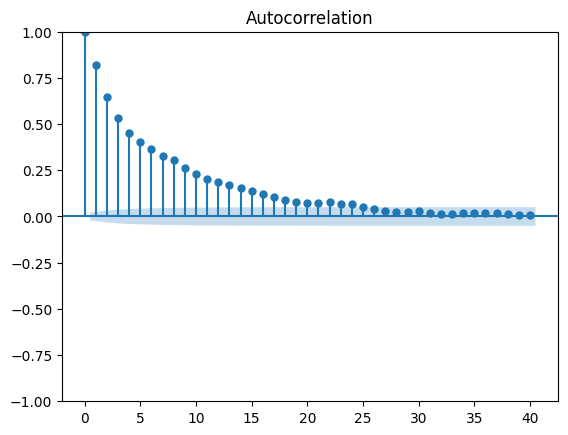

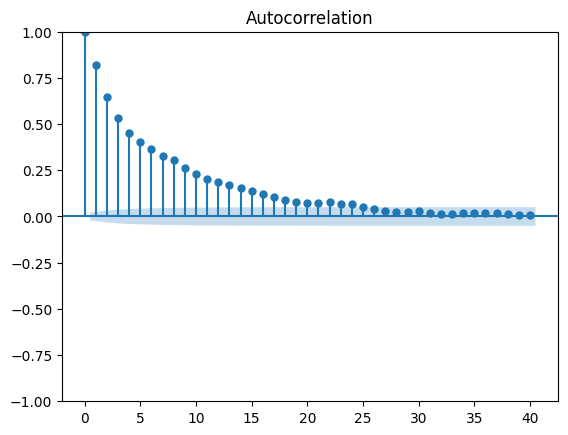

In [13]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(data['tp'])

In [14]:
def scaler(data):
    for column in data.columns:
        if data[column].mean()>1:
            data[column] = (data[column]-data[column].min())/(data[column].max()-data[column].min())
    return data
scaler(data)

,mxtpr,mlspr,tp
2022-01-01 00:00:00,-4.336809e-19,0.0,0.0
2022-01-01 01:00:00,-4.336809e-19,0.0,0.0
2022-01-01 02:00:00,-4.336809e-19,0.0,0.0
2022-01-01 03:00:00,-4.336809e-19,0.0,0.0
2022-01-01 04:00:00,-4.336809e-19,0.0,0.0
...,...,...,...
2022-12-31 19:00:00,-4.336809e-19,0.0,0.0
2022-12-31 20:00:00,-4.336809e-19,0.0,0.0
2022-12-31 21:00:00,-4.336809e-19,0.0,0.0
2022-12-31 22:00:00,-4.336809e-19,0.0,0.0


In [15]:
def split_data(data,time_steps):
    Xs,Ys = [],[]
    for rownum in range(len(data)):
        end = rownum + time_steps
        if end<len(data):
            seqx = data[rownum:end]
            seqy = data['tp'][end]
            
            Xs.append(seqx)
            Ys.append(seqy)
    return np.array(Xs),np.array(Ys)
step = 3
X,y = split_data(data,step)

In [16]:
Xtrain,ytrain = X[:8000],y[:8000]
Xtest,ytest = X[8000:],y[8000:]

In [17]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf

In [18]:
model = Sequential()
model.add(LSTM(24,input_shape=(Xtrain.shape[1], Xtrain.shape[2]),return_sequences=True))
model.add(LSTM(12,input_shape=(Xtrain.shape[1], Xtrain.shape[2])))
#model.add(LSTM(50, activation='relu'))
#model.add(Dense(12,'relu'))
model.add(Dense(1,'linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 3, 24)             2688      
                                                                 
 lstm_1 (LSTM)               (None, 12)                1776      
                                                                 
 dense (Dense)               (None, 1)                 13        
                                                                 
Total params: 4,477
Trainable params: 4,477
Non-trainable params: 0
_________________________________________________________________


In [19]:
with tf.device('/GPU:0'):
    model.compile(loss='mae',optimizer=Adam(learning_rate=0.0003))
    model.fit(Xtrain, ytrain, epochs=50)

Epoch 1/50
250/250 [==============================] - 13s 5ms/step - loss: 1.8814e-04
Epoch 2/50
250/250 [==============================] - 1s 5ms/step - loss: 1.2515e-04
Epoch 3/50
250/250 [==============================] - 1s 5ms/step - loss: 1.1235e-04
Epoch 4/50
250/250 [==============================] - 1s 5ms/step - loss: 1.1827e-04
Epoch 5/50
250/250 [==============================] - 1s 5ms/step - loss: 1.1488e-04
Epoch 6/50
250/250 [==============================] - 1s 5ms/step - loss: 9.9422e-05
Epoch 7/50
250/250 [==============================] - 1s 5ms/step - loss: 1.0622e-04
Epoch 8/50
250/250 [==============================] - 1s 5ms/step - loss: 9.7205e-05
Epoch 9/50
250/250 [==============================] - 2s 6ms/step - loss: 9.5609e-05
Epoch 10/50
250/250 [==============================] - 1s 5ms/step - loss: 9.1419e-05
Epoch 11/50
250/250 [==============================] - 1s 5ms/step - loss: 1.0091e-04
Epoch 12/50
250/250 [==============================] - 1s 5ms/

In [20]:
pre = model.predict(Xtest)

24/24 [==============================] - 1s 3ms/step


In [21]:
from sklearn.metrics import mean_absolute_error

In [22]:
mean_absolute_error(ytest,pre)

4.999128115220208e-05

In [23]:
vis = pd.DataFrame(ytest)
vis['pre'] = pre
vis.columns = ['test','pre']

<AxesSubplot: >

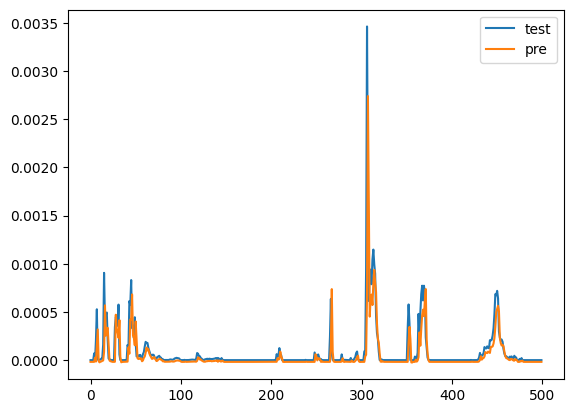

In [24]:
vis[:500].plot()

In [25]:
vis

,test,pre
0,0.00000,-0.000018
1,0.00000,-0.000018
2,0.00000,-0.000018
3,0.00000,-0.000018
4,0.00007,-0.000018
...,...,...
752,0.00000,-0.000018
753,0.00000,-0.000018
754,0.00000,-0.000018
755,0.00000,-0.000018


In [26]:
import xgboost as xgb

In [27]:
data['target'] = data['tp'].shift(-1)

In [28]:
data=data[:-1]

In [29]:
x =data.iloc[:,:3]
y=data['target']

xtrain,ytrain= x[:8000] , y[:8000]
xtest,ytest= x[8000:] , y[8000:]

In [30]:
with tf.device('/GPU:0'):
    xgb_regressor = xgb.XGBRegressor(eval_metric='mape',n_estimators=2000,learning_rate=0.1)
    xgb_regressor.fit(xtrain,ytrain)

In [31]:
pre = xgb_regressor.predict(xtest)

In [32]:
mean_absolute_error(ytest,pre)

3.770317992456958e-05

In [33]:
frame = pd.DataFrame(pd.Series(pre, index=ytest.index))
frame['test'] = ytest
frame.columns = ['pre','test']

<AxesSubplot: >

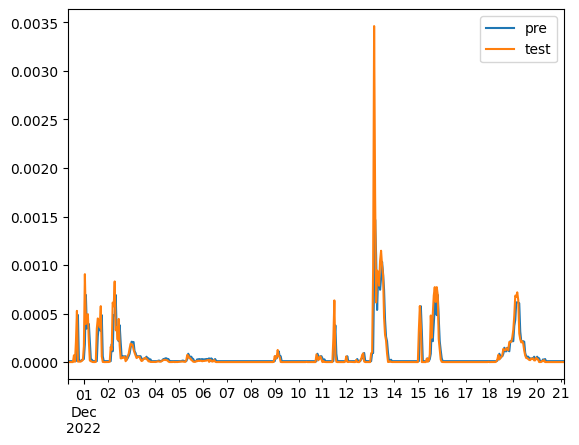

In [34]:
frame[:500].plot()